In [312]:
!pip install pdfminer

**Import important libraries**

In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**Import & reading the csv file**

In [314]:
#kaggle - https://www.kaggle.com/datasets/mdjafrilalamshihab/resume/
df = pd.read_csv('/content/ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


**Explore the Dataset**

In [315]:
print("Number of rows: ", df.shape[0],"Number of columns : ", df.shape[1])

Number of rows:  962 Number of columns :  2


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


**Plotting the distribution of Categories**

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

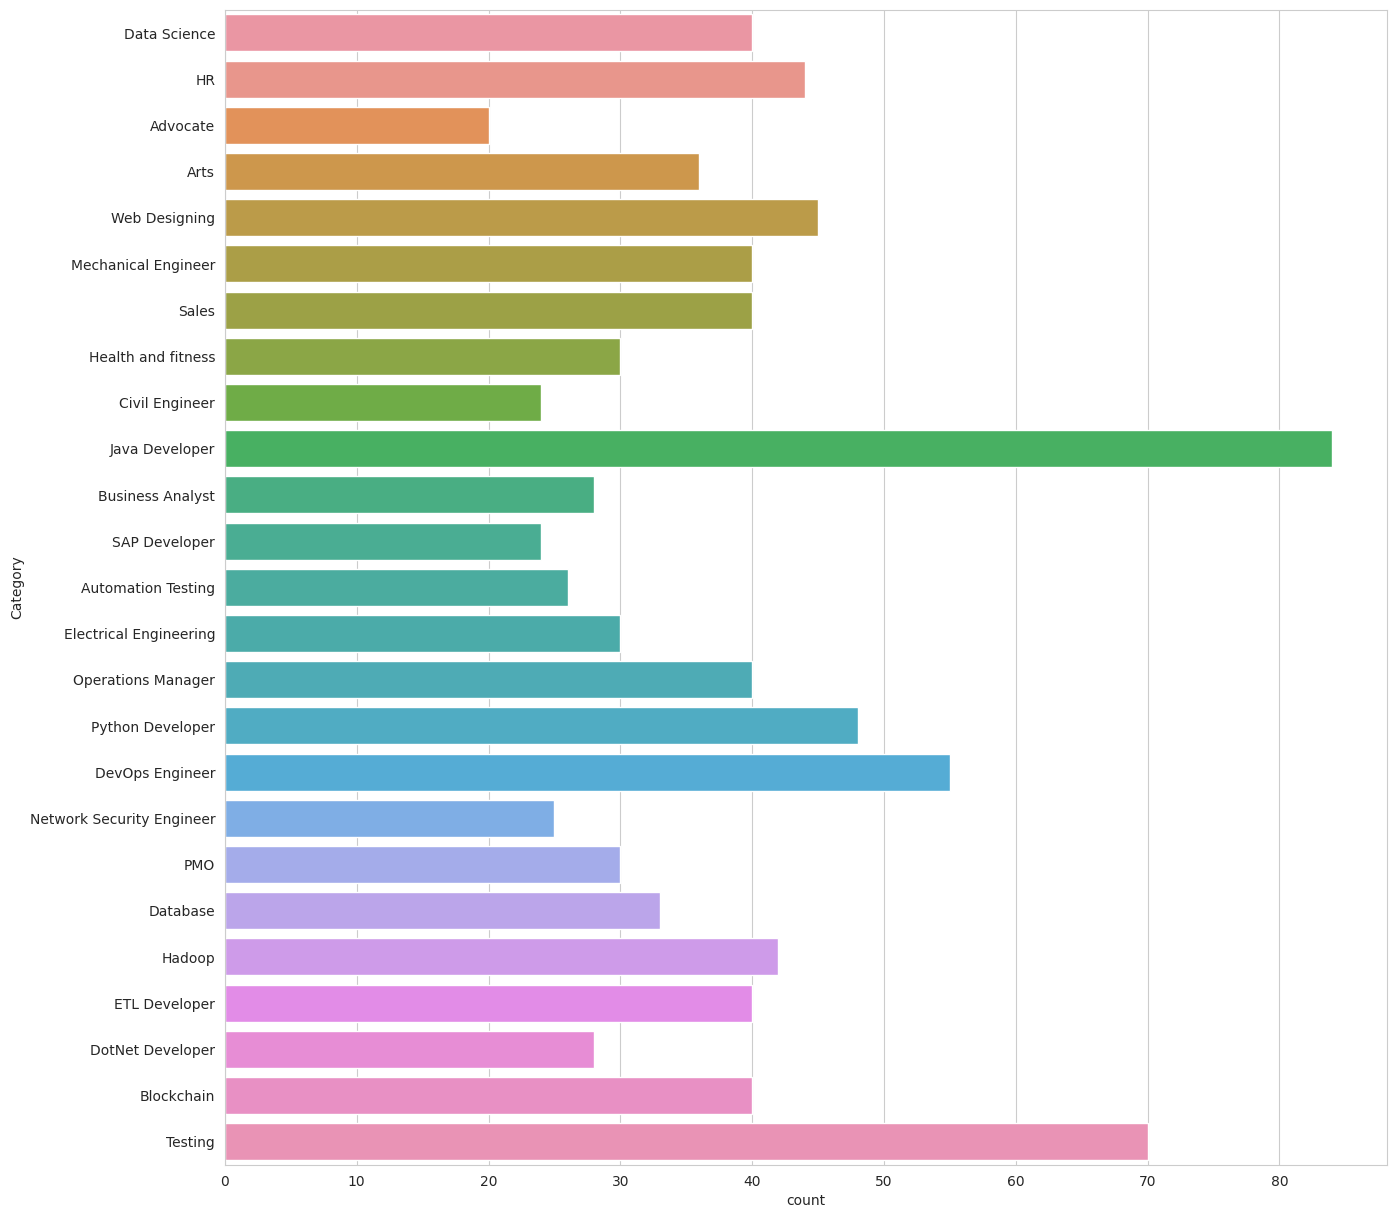

In [317]:
plt.figure(figsize = (15,15))
sns.countplot(y = "Category", data = df)
df["Category"].value_counts()

Java Developer               8.73
Testing                      7.28
DevOps Engineer              5.72
Python Developer             4.99
Web Designing                4.68
HR                           4.57
Hadoop                       4.37
Blockchain                   4.16
ETL Developer                4.16
Operations Manager           4.16
Data Science                 4.16
Sales                        4.16
Mechanical Engineer          4.16
Arts                         3.74
Database                     3.43
Electrical Engineering       3.12
Health and fitness           3.12
PMO                          3.12
Business Analyst             2.91
DotNet Developer             2.91
Automation Testing           2.70
Network Security Engineer    2.60
SAP Developer                2.49
Civil Engineer               2.49
Advocate                     2.08
Name: Category, dtype: float64

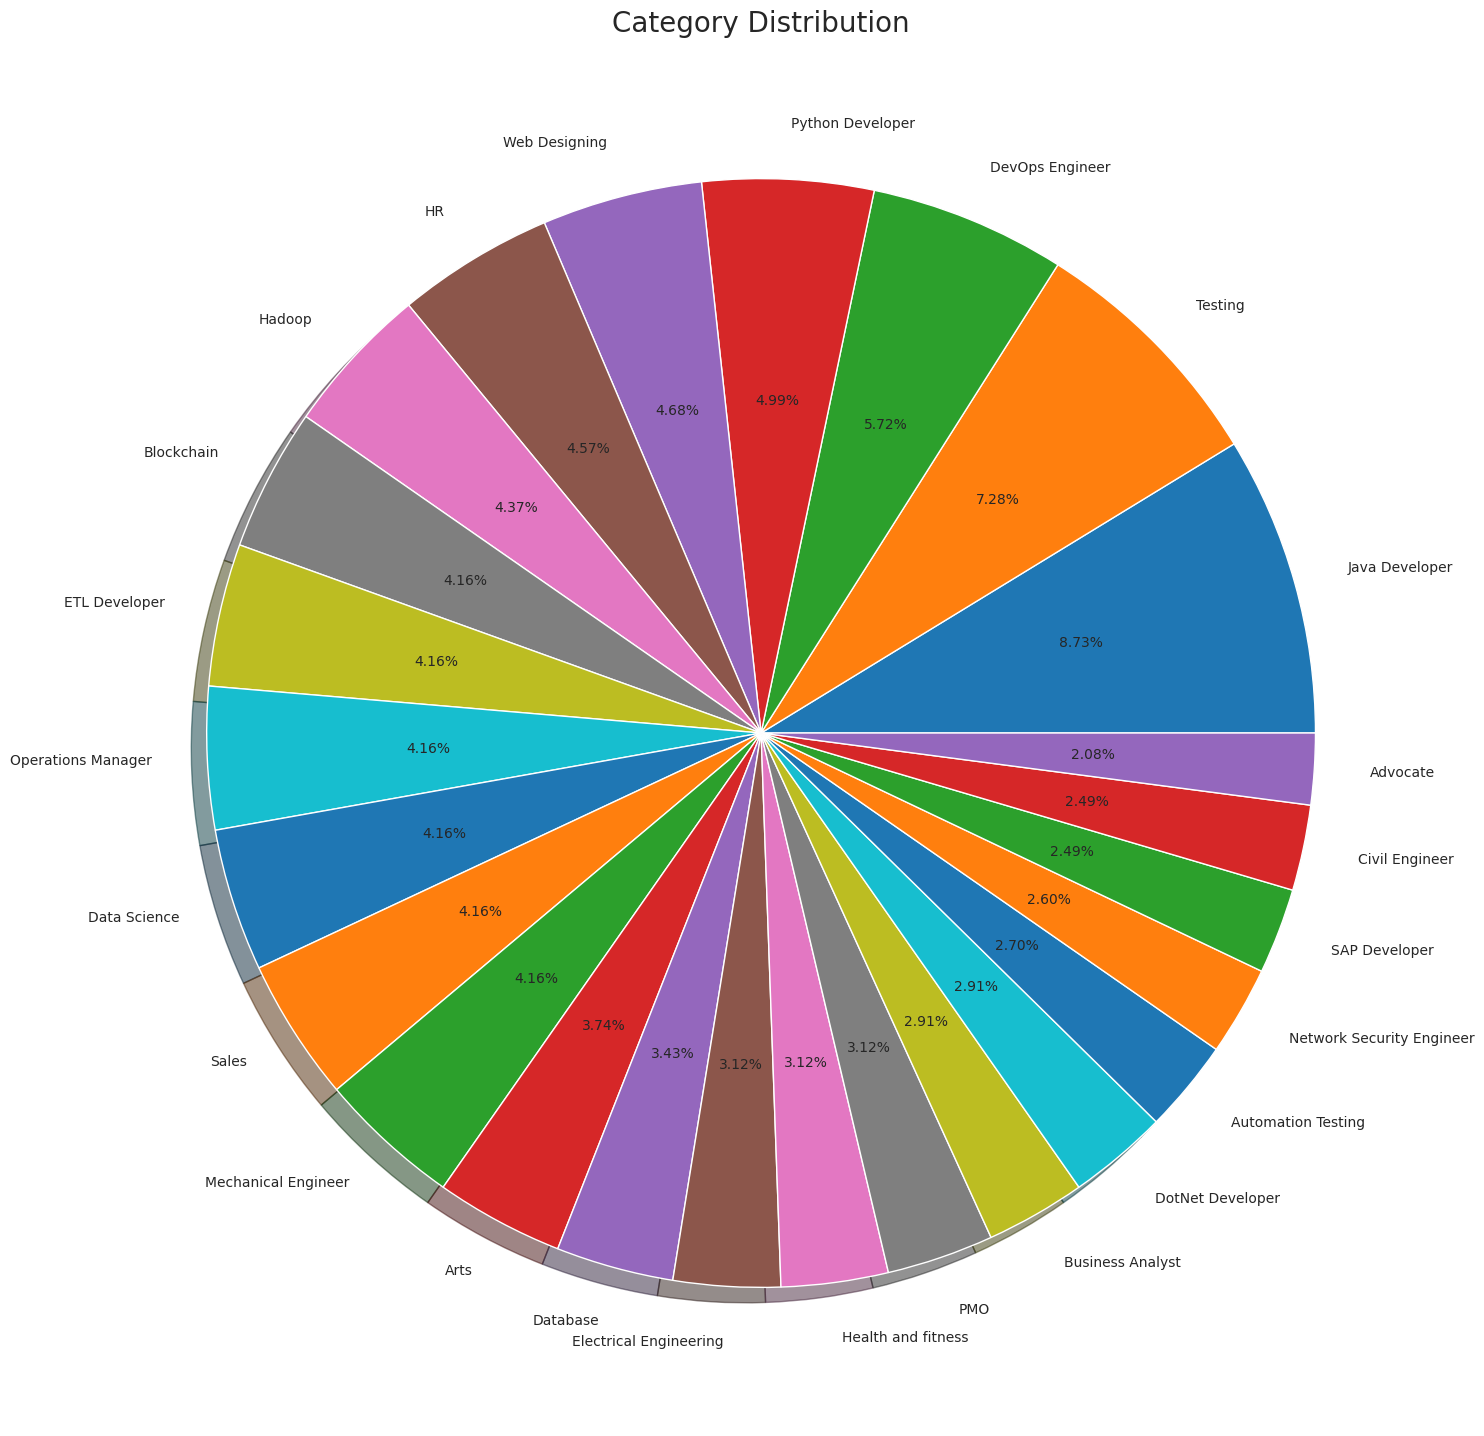

In [318]:
plt.figure(figsize = (18,18))
Category = df['Category'].value_counts().reset_index()['Category']
Labels = df['Category'].value_counts().reset_index()['index']
plt.title("Category Distribution", fontsize=20)
plt.pie(Category, labels = Labels, autopct = '%1.2f%%', shadow = True)
df["Category"].value_counts()*100/df.shape[0]

**Create a new column for data processing**

In [319]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)

In [320]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

In [321]:
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [322]:
df["res_new"] = eval_res
df = df.reset_index(drop = True)

In [323]:
df = df[["Category","res_new","Resume"]]
df['res_new'].replace('', np.nan, inplace=True)
df.dropna(subset=['res_new'], inplace=True)
df = df.reset_index(drop = True)
df.shape
df.head()

<ipython-input-323-781f09410d46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_new'].replace('', np.nan, inplace=True)


,Category,res_new,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details \r\n MCA YMCAUST, Faridab..."


In [324]:
length = df["res_new"].shape
eval_res = df["res_new"].copy(deep=True)
df.shape

(962, 3)

**Tokenization**

In [325]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res[i]))
    eval_res[i] = " ".join(token).lower()
eval_res_backup  = eval_res.copy(deep = True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Encoding to ASCII**

In [ ]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode()
eval_res.shape

(962,)

In [326]:
df["res_new"] = eval_res

In [327]:
df_cols = ["Category","res_new","Resume"]
df = df[df_cols]
df.head()

,Category,res_new,Resume
0,Data Science,skills * programming languages : python ( pand...,Skills * Programming Languages: Python (pandas...
1,Data Science,education details may 2013 may 2017 b.e uit-rg...,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"areas interest deep learning , control system ...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"education details mca ymcaust , faridabad , ha...","Education Details \r\n MCA YMCAUST, Faridab..."


**Working with some specific pattern**

In [328]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-\_][.\-\_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [329]:
df["newer_res"] = df["res_new"]
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO,"",j[3])
    strin = re.sub(REGEX_EMAIL,"",strin)
    strin = re.sub(REGEX_SPACE,"",strin)
    strin  =re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', strin)
    strin = re.sub(REGEX_JUNK, "" ,strin)
    df["newer_res"][i] = strin

In [330]:
df = df[["Category","newer_res","Resume"]]
df.head()

,Category,newer_res,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCAYMCAUST,Faridabad,Ha...","Education Details \r\n MCA YMCAUST, Faridab..."


In [331]:
df = df[["Category","newer_res","Resume"]]
df['newer_res'].replace('', np.nan, inplace=True)
df.dropna(subset=['newer_res'], inplace=True)
df = df.reset_index(drop = True)
df.shape

(962, 3)

In [332]:
df = df.drop(['Resume'],axis=1)
df.rename(columns={'newer_res':'Resume'},inplace=True)
resume_punc = df["Resume"].copy(deep  = True)
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA...
4,Data Science,"Education Details \r\n MCAYMCAUST,Faridabad,Ha..."


In [333]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

**Remove punctaution again**

In [334]:
for ind,i in enumerate(df.itertuples()):
    token = nltk.word_tokenize(i[2])
    #print(token)
    df["Resume"][ind] = " ".join(rem_punc(token))

In [336]:
import string
from wordcloud import STOPWORDS
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

def preprocess(eval_res):
    try:
        eval_res = eval(eval_res).decode()
    except:
        pass
    eval_res = eval_res.encode("ASCII","ignore").decode()
    length = len(eval_res)
    eval_res = " ".join(eval_res.split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res))
    eval_res = " ".join(token).lower()
    return eval_res

In [337]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B.EUIT-...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCAYMCAUST Faridabad Haryana...


**Add Category ID**

In [338]:
from io import StringIO
col = ['Category', 'Resume']
df = df[col]
df = df[pd.notnull(df['Resume'])]
df.columns = ['Category', 'Resume']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

df.head()

,Category,Resume,category_id
0,Data Science,Skills Programming Languages Python pandas num...,0
1,Data Science,Education Details May 2013 to May 2017 B.EUIT-...,0
2,Data Science,Areas of Interest Deep Learning Control System...,0
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...,0
4,Data Science,Education Details MCAYMCAUST Faridabad Haryana...,0


**Vectorization**

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(962, 27626)

**Data Spliting for Train & Test**

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

x_train, x_test, y_train, y_test = train_test_split(df['Resume'], df['Category'],test_size = 0.3, random_state = 0)

print(x_test)
count_vect = CountVectorizer() # bag-of-ngrams model , based on frequency count
x_train_counts = count_vect.fit_transform(x_train)
#x_test_counts = count_vect.fit_transform(x_test)
#passing the word:word count
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

590    Technical Skills Languages Python Python Frame...
278    Education Details January 2018 M.S Nutrition a...
14     Education Details MCAYMCAUST Faridabad Haryana...
678    Operating Systems Windows Linux Ubuntu Network...
338    Education Details BE ITpjlce Java Developer Ja...
                             ...                        
888    Skills Strong CS fundamentals and problem solv...
519    Education Details BCAVinayaka Missions Univers...
20     Skills Programming Languages Python pandas num...
871    SKILLS Bitcoin Ethereum Solidity Hyperledger B...
744    Operating systems -Linux- Ubuntu Windows 2007/...
Name: Resume, Length: 289, dtype: object


**Check some ML Models using Cross Validation**

In [348]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    DecisionTreeClassifier(random_state=0),
    XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic'),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]


CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [349]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    1.00
LinearSVC                 1.00
LogisticRegression        1.00
MultinomialNB             0.98
RandomForestClassifier    0.70
XGBClassifier             0.99
Name: accuracy, dtype: float64

**Training the final model(LinearSVC) Again**\
**Why?**
- It can handle high dimensional data
- Faster than Neural Network based model
- Obtained maxmum accuracy & F1 Score
- Work good in non linear decision boundaries

In [385]:
classifier = LinearSVC()
classifier.fit(x_train_tfidf, y_train)

LinearSVC()

**Saving the Model**

In [386]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

**Load the model**

In [387]:
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(x_test, y_test)

**PDF to Text Converting**

In [388]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convertPDFtoText(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    #codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()
    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)
    fp.close()
    device.close()
    string = retstr.getvalue()
    retstr.close()
    return string

**Load the PDF**

In [389]:
path = "/content/CV.pdf"
test_resume = convertPDFtoText(path)
print(test_resume)

LinkedIn : linkedin.com/in/jafrilalam
Github : 1707073jafril
Kaggle : mdjafrilalamshihab
Website : sites.google.com/view/mdjafrilalam/

Cell : +8801866006338
Email: jafrilalamshihab.kuetcse@gmail.com
Cumilla , Bangladesh
ORCID : 0000-0003-4376-4572

Md. Jafril Alam

RESEARCH
DOMAIN

Multimodal AI, Generative AI, Machine Learning, Deep Learning, Com-
puter Vision, Natural Linguistic and Signal Processing

EDUCATION

Khulna University of Engineering & Technology, Khulna-9203 , Bangladesh
Computer Science and Engineering
January , 2018 - March , 2023(expected)
Current CGPA : 2.89
On going thesis : Gastrointestinal tract image segmentation for proper radiation ther-
apy of cancer patients

THERORITICAL
KNOWLEDGE

Algorithm Analysis, Data Structure, Computational Thinking, Mathemat-
ics for Engineers, Statistics and Probability, DBMS, Agile Methodology,
Deep Learning, Machine Learning, Pattern Recognition, Digital Literacy
and Physics

TECHNICAL
SKILLS

Programming Language:
Excellent knowl

**Prediction on the Unseen PDF**

In [390]:
print(loaded_model.predict(count_vect.transform([test_resume])))

['Data Science']


**Save the Output CSV File**

In [391]:
a = loaded_model.predict(count_vect.transform([test_resume]))

In [392]:
import pandas as pd
data_cat = [[path , a]]
df_cat = pd.DataFrame(data_cat, columns=['File', 'Resume Categoty'])
df_cat

,File,Resume Categoty
0,/content/CV.pdf,[Data Science]


In [393]:
df_cat.to_csv('category.csv')

**Accuracy and Other Metrices**

In [394]:
predicted = []
for i in x_test:
    predicted.append((classifier.predict(count_vect.transform([i])))[0])

In [395]:
res= pd.DataFrame(y_test)
res['predicted'] = predicted
res.head()

,Category,predicted
590,Python Developer,Python Developer
278,Health and fitness,Health and fitness
14,Data Science,Data Science
678,Network Security Engineer,Network Security Engineer
338,Java Developer,Java Developer


In [396]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
accuracy=accuracy_score(res.Category, res.predicted)
print("Accuracy :",accuracy)

Accuracy : 0.9930795847750865


In [397]:
from sklearn import metrics

print(metrics.classification_report(res.Category, res.predicted, target_names=df['Category'].unique()))

                           precision    recall  f1-score   support

             Data Science       1.00      1.00      1.00         4
                       HR       1.00      1.00      1.00         4
                 Advocate       0.89      1.00      0.94         8
                     Arts       1.00      1.00      1.00        15
            Web Designing       1.00      1.00      1.00        10
      Mechanical Engineer       1.00      1.00      1.00        10
                    Sales       1.00      1.00      1.00        14
       Health and fitness       1.00      1.00      1.00        10
           Civil Engineer       1.00      0.87      0.93        15
           Java Developer       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00        11
            SAP Developer       1.00      1.00      1.00        13
       Automation Testing       1.00      1.00      1.00        12
   Electrical Engineering       1.00      1.00      1.00     